<a href="https://colab.research.google.com/github/edsondamasceno/Data-Analysis/blob/main/Telco_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rotatividade de clientes de telecomunicações

Este projeto tem como foco o estudo do churn de clientes em uma empresa do setor de telecomunicações, a partir da análise de dados demográficos, padrões de utilização dos serviços e informações de cobrança. A proposta é compreender quais variáveis influenciam o cancelamento e desenvolver um modelo de machine learning capaz de estimar a probabilidade de um cliente encerrar o contrato.

Principais analises:

*   Analisar o comportamento do cliente e os padrões de rotatividade
*   Identificar os principais fatores que influenciam a rotatividade de clientes
*   Realizar análise exploratória de dados (AED)
*   Construir modelos de aprendizado de máquina para previsão de rotatividade
*   Avaliar o desempenho do modelo usando métricas de classificação



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Dataset/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Converter TotalCharges para valor numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [4]:
# Lidar com valores ausentes
df = df.dropna()

In [5]:
# Codificar variável de destino
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


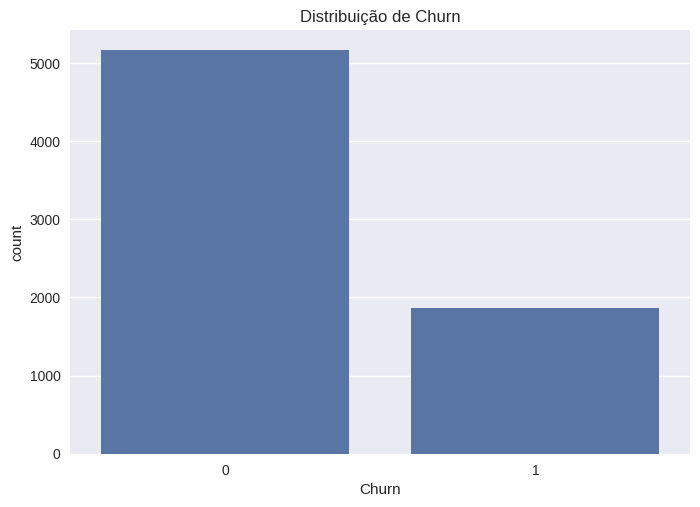

In [7]:
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Churn')
plt.show()

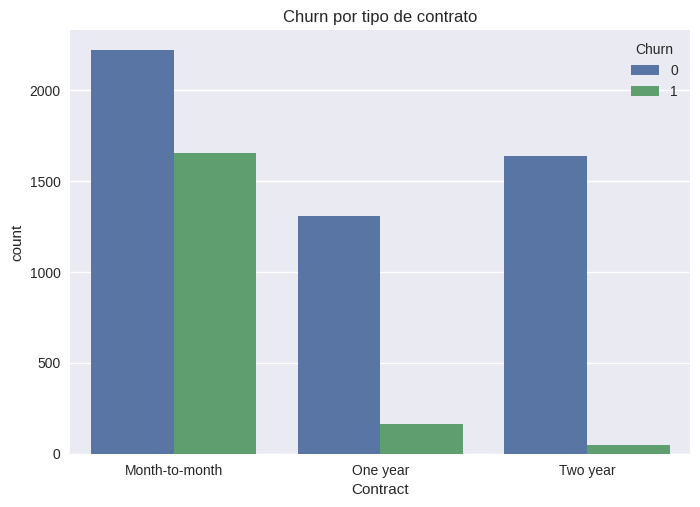

In [8]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por tipo de contrato')
plt.show()

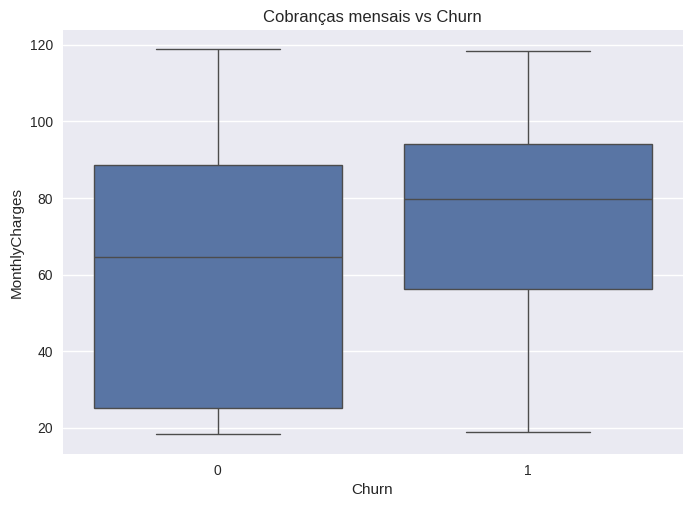

In [9]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Cobranças mensais vs Churn')
plt.show()

In [10]:
df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


In [11]:
df.groupby('Churn')['MonthlyCharges'].mean()

,MonthlyCharges
Churn,
0,61.307408
1,74.441332


A análise exploratória dos dados (EDA) indica que clientes com contratos de curto prazo, especialmente os mensais, possuem maior propensão ao cancelamento quando comparados àqueles que firmam contratos de longa duração.

# Predição

In [41]:
# Codificar características categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

In [42]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
df = df.drop('customerID', axis=1)

In [45]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [46]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [96]:
lr = LogisticRegression(max_iter=2000, solver='liblinear')
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.8038
Precision: 0.6476
Recall   : 0.5749
F1-score : 0.6091


In [97]:
# Iniciar lista de resultados
results = []

results.append({
            'Model': 'Logistic Regression',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

comparison = pd.DataFrame(results)

## Random Forest

In [98]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7918
Precision: 0.6337
Recall   : 0.5134
F1-score : 0.5672


In [99]:
results.append({
            'Model': 'Random Forest',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

comparison = pd.DataFrame(results)

## XGBoost

In [100]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7783
Precision: 0.5891
Recall   : 0.5481
F1-score : 0.5679


In [101]:
results.append({
            'Model': 'XGBoost',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

comparison = pd.DataFrame(results)

## K-Nearest Neighbors (KNN)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7463
Precision: 0.5281
Recall   : 0.4278
F1-score : 0.4727


In [103]:
results.append({
            'Model': 'KNN',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

comparison = pd.DataFrame(results)

## Redes Neurais (MLP)

In [104]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(200, 50))
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp)
recall = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.7747
Precision: 0.7615
Recall   : 0.2219
F1-score : 0.3437


In [105]:
results.append({
            'Model': 'MLP',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1
        })

comparison = pd.DataFrame(results)

## Relatório de Classificação

In [81]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [106]:
comparison.head()

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.803838,0.647590,0.574866,0.609065
1,Random Forest,0.791756,0.633663,0.513369,0.567208
2,XGBoost,0.778252,0.589080,0.548128,0.567867
3,KNN,0.746269,0.528053,0.427807,0.472674
4,MLP,0.774698,0.761468,0.221925,0.343685


Nossa análise demonstra que classificadores mais complexos nem sempre é melhor. A regressão logística apresentou a melhor acuracia, de 80,38%, tornando-se nossa principal ferramenta para esta tarefa de previsão.

# Visualizando a distribuição de clientes por diversos serviços

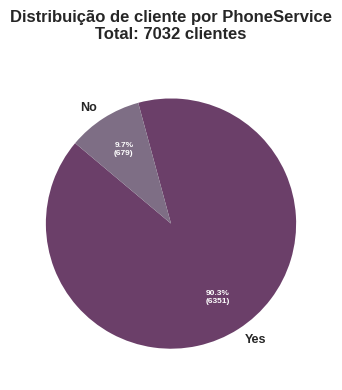

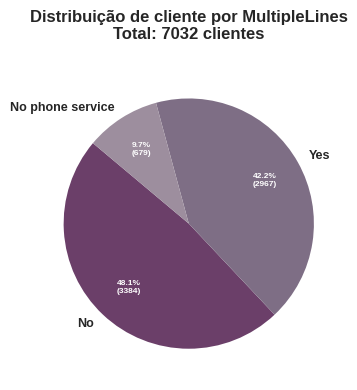

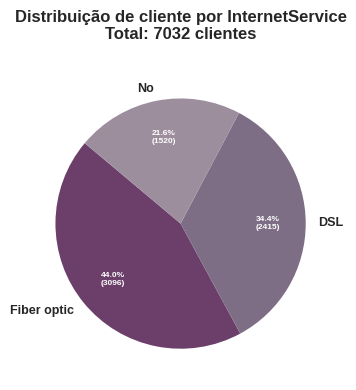

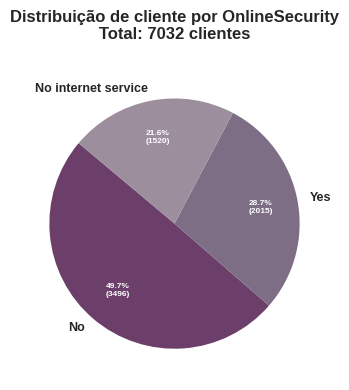

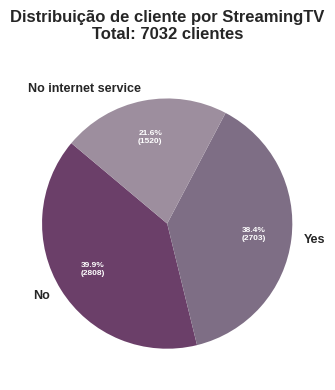

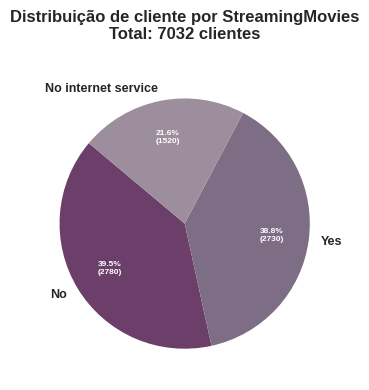

In [57]:
demographic_columns = ["PhoneService", "MultipleLines", "InternetService",
                      "OnlineSecurity", "StreamingTV", "StreamingMovies"]

mauve_palette = ['#6B3F69', '#7E6E85', '#9D8E9E', '#B8A9C6', '#D4C5D7']

for col in demographic_columns:
    plt.figure(figsize=(6,4))

    value_counts = df[col].value_counts()

    # Pie Chart
    patches, texts, autotexts = plt.pie(value_counts.values,
                                        labels=value_counts.index,
                                        colors=mauve_palette[:len(value_counts)],
                                        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(value_counts.values)/100)})',
                                        startangle=140,
                                        pctdistance=0.70,
                                        textprops={'fontsize': 10})

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(6)

    for text in texts:
        text.set_fontsize(9)
        text.set_fontweight('bold')

    plt.title(f'Distribuição de cliente por {col}\nTotal: {len(df)} clientes',
              fontsize=12, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.show()

## Análise de Correlação

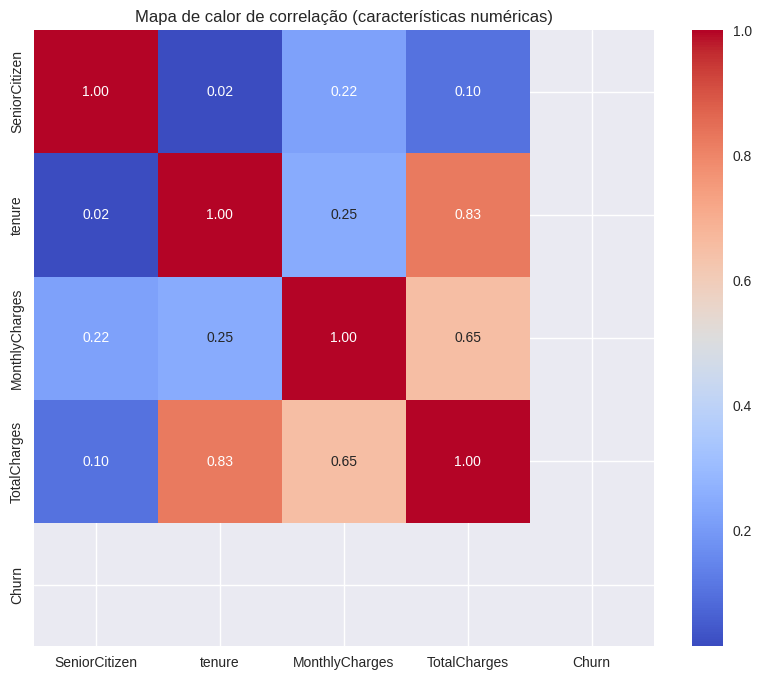

In [87]:
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

numeric_df = df_corr.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlação (características numéricas)')
plt.show()

Foram identificadas correlações entre o valor das cobranças mensais e o índice de cancelamento. Além disso, constatou-se forte multicolinearidade entre as cobranças totais e o tempo de permanência do cliente, o que é esperado, uma vez que períodos mais longos de permanência resultam em maiores valores acumulados pagos ao longo do tempo.